----------------------------

### BLACKWELL_CALEN'S code starts here: ###

In [250]:
#Import YAML, argparse, and matplotlib

import yaml
import matplotlib.pyplot as plt
import argparse

In [251]:
#Loading pandas

import pandas as pd

#display all columns
pd.set_option("display.max_columns", None)

In [252]:
#Argparse code:
import argparse
import sys

parser = argparse.ArgumentParser(description='DineSafe TO trends: Establishments and Fines')
parser.add_argument('--title', '-t', type=str, help='Plot title',default='DineSafe TO trends')
parser.add_argument('--output_file', '-o', type=str, help='Output plot filename',default='DineSafe_TO_Analysis')

# Parse only known arguments, ignoring any unrecognized arguments
args, _ = parser.parse_known_args()

# Access the arguments using args.title and args.output_file
print("Title:", args.title)
print("Output file:", args.output_file)


Title: DineSafe TO trends
Output file: DineSafe To Analysis


In [253]:
#Config files
config_files = ['systemconfig.yml', 'jobconfig.yml']
config = {}

for this_config_file in config_files:
    with open(this_config_file, 'r') as yamlfile:
        this_config = yaml.safe_load(yamlfile)
        config.update(this_config)


In [254]:

# Task 1: Load the data to a single DataFrame, using the config files
dine_safe_TO = pd.read_csv(config['dataset'])

In [255]:
# Task 2: Profile the DataFrame
# Showing column names,using the info() method.     

dine_safe_TO.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78368 entries, 0 to 78367
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        78368 non-null  int64  
 1   Rec #                      78368 non-null  int64  
 2   Establishment ID           78368 non-null  int64  
 3   Inspection ID              77930 non-null  float64
 4   Establishment Name         78368 non-null  object 
 5   Establishment Type         78368 non-null  object 
 6   Establishment Address      78368 non-null  object 
 7   Establishment Status       78368 non-null  object 
 8   Min. Inspections Per Year  78368 non-null  object 
 9   Infraction Details         49138 non-null  object 
 10  Inspection Date            77930 non-null  object 
 11  Severity                   49138 non-null  object 
 12  Action                     49138 non-null  object 
 13  Outcome                    212 non-null    obj

In [256]:
# Data types when loaded
print('The data types are:\n', 
      dine_safe_TO.dtypes)

The data types are:
 _id                            int64
Rec #                          int64
Establishment ID               int64
Inspection ID                float64
Establishment Name            object
Establishment Type            object
Establishment Address         object
Establishment Status          object
Min. Inspections Per Year     object
Infraction Details            object
Inspection Date               object
Severity                      object
Action                        object
Outcome                       object
Amount Fined                 float64
Latitude                     float64
Longitude                    float64
dtype: object


In [257]:
# This shows the NaNs in each columns

dine_safe_TO.isna().sum()

_id                              0
Rec #                            0
Establishment ID                 0
Inspection ID                  438
Establishment Name               0
Establishment Type               0
Establishment Address            0
Establishment Status             0
Min. Inspections Per Year        0
Infraction Details           29230
Inspection Date                438
Severity                     29230
Action                       29230
Outcome                      78156
Amount Fined                 78229
Latitude                         0
Longitude                        0
dtype: int64

In [258]:
# Shape of the DataFrame
print("The shape of the DataFrame:\n", 
      dine_safe_TO.shape)

The shape of the DataFrame:
 (78368, 17)


In [259]:
# Task 3: Generate summary statistics


# #rename all columns to lower case
dine_safe_TO = dine_safe_TO.rename(columns=str.lower)


In [260]:
dine_safe_TO.head() # Now, all columns are in lower case

,_id,rec #,establishment id,inspection id,establishment name,establishment type,establishment address,establishment status,min. inspections per year,infraction details,inspection date,severity,action,outcome,amount fined,latitude,longitude
0,1,1,10657713,104953972.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Pass,2,NaN,2022-04-05,NaN,NaN,NaN,NaN,43.74791,-79.52219
1,2,2,10657713,105133203.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-03-07,M - Minor,Notice to Comply,NaN,NaN,43.74791,-79.52219
2,3,3,10657713,105133203.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Pass,2,Operate food premise - equipment not arranged ...,2023-03-07,M - Minor,Notice to Comply,NaN,NaN,43.74791,-79.52219
3,4,4,10657713,105238109.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Pass,2,NaN,2023-08-25,NaN,NaN,NaN,NaN,43.74791,-79.52219
4,5,5,10752656,104965345.0,# HASHTAG INDIA RESTAURANT,Food Take Out,1871 O'CONNOR DR,Pass,3,FOOD PREMISE NOT MAINTAINED WITH FOOD HANDLING...,2022-04-29,M - Minor,Notice to Comply,NaN,NaN,43.72199,-79.30349


In [261]:
# For numeric columns: What are the max, min, mean, and median?

dine_safe_TO.describe()

,_id,rec #,establishment id,inspection id,amount fined,latitude,longitude
count,78368.000000,78368.000000,7.836800e+04,7.793000e+04,139.000000,78368.000000,78368.000000
mean,39184.500000,39184.500000,1.039211e+07,1.051455e+08,465.525180,43.698535,-79.399352
std,22623.037285,22623.037285,5.750787e+05,1.096135e+05,725.862334,0.052722,0.082588
min,1.000000,1.000000,1.222579e+06,1.044018e+08,0.000000,43.587910,-79.634550
25%,19592.750000,19592.750000,1.039373e+07,1.050572e+08,75.000000,43.654790,-79.445560
50%,39184.500000,39184.500000,1.060207e+07,1.051483e+08,380.000000,43.685480,-79.399080
75%,58776.250000,58776.250000,1.073385e+07,1.052411e+08,580.000000,43.737830,-79.353040
max,78368.000000,78368.000000,1.080404e+07,1.053256e+08,6250.000000,43.839140,-79.130690


In [262]:
# Of note, there are non-numeric (text) columns in this Data Frame
    # For text columns: What is the most common value? How many unique values are there?
    # For these questions, we can use the describe(include='object') method.
    # After running this code, we can see how many unique values ('unique') and the most common values in each column.

dine_safe_TO.describe(include='object')

,establishment name,establishment type,establishment address,establishment status,min. inspections per year,infraction details,inspection date,severity,action,outcome
count,78368,78368,78368,78368,78368,49138,77930,49138,49138,212
unique,13988,56,14708,2,4,227,553,4,11,5
top,TIM HORTONS,Restaurant,100 PRINCES BLVD,Pass,2,FAIL TO ENSURE EQUIPMENT SURFACE SANITIZED AS ...,2023-08-18,M - Minor,Notice to Comply,Conviction - Fined
freq,1324,39936,294,77794,39550,6150,350,28748,40027,126


In [263]:
# Task 4: Rename one or more columns in the DataFrame
# We will rename the columns so that we replace spaces with underscores as well as convert all letters to lowercase.

def clean_names(string):
    return string.lower().replace(' ', '_')

print(list(dine_safe_TO)) # prints the original column names in a list

dine_safe_TO = dine_safe_TO.rename(columns=clean_names)

print(list(dine_safe_TO)) # prints the new, renamed column names in a list


['_id', 'rec #', 'establishment id', 'inspection id', 'establishment name', 'establishment type', 'establishment address', 'establishment status', 'min. inspections per year', 'infraction details', 'inspection date', 'severity', 'action', 'outcome', 'amount fined', 'latitude', 'longitude']
['_id', 'rec_#', 'establishment_id', 'inspection_id', 'establishment_name', 'establishment_type', 'establishment_address', 'establishment_status', 'min._inspections_per_year', 'infraction_details', 'inspection_date', 'severity', 'action', 'outcome', 'amount_fined', 'latitude', 'longitude']


In [264]:
# Task 4a: To rename one column, we can also do the following:

print(list(dine_safe_TO)) # original column list

dine_safe_TO = dine_safe_TO.rename(columns={'rec_#':'record_number'})

print(list(dine_safe_TO)) # notice that 'rec_#' has been renamed to 'record_number'

['_id', 'rec_#', 'establishment_id', 'inspection_id', 'establishment_name', 'establishment_type', 'establishment_address', 'establishment_status', 'min._inspections_per_year', 'infraction_details', 'inspection_date', 'severity', 'action', 'outcome', 'amount_fined', 'latitude', 'longitude']
['_id', 'record_number', 'establishment_id', 'inspection_id', 'establishment_name', 'establishment_type', 'establishment_address', 'establishment_status', 'min._inspections_per_year', 'infraction_details', 'inspection_date', 'severity', 'action', 'outcome', 'amount_fined', 'latitude', 'longitude']


In [265]:
# Task 5: Select a single column and find its unique values

dine_safe_TO['establishment_type'].unique()


array(['Food Depot', 'Food Take Out', 'Food Store (Convenience/Variety)',
       'Restaurant', 'Food Processing Plant', 'Food Caterer',
       'Community Kitchen (Meal Program)', 'Retirement Homes(Licensed)',
       'Boarding / Lodging Home - Kitchen', 'Bakery',
       'Cocktail Bar / Beverage Room', 'Cafeteria - Private Access',
       'Food Bank', 'Mobile Food Preparation Premises', 'Private Club',
       'Supermarket', 'Food Cart', 'Food Court Vendor',
       'Child Care - Food Preparation', 'Flea Market',
       'Child Care - Catered', 'Butcher Shop', 'Fish Shop',
       'Student Nutrition Site', 'Fairs / Festivals / Special Occasions',
       'Serving Kitchen', 'Commissary', 'Institutional Food Services',
       'Secondary School Food Services',
       'Other Educational Facility Food Services', 'Hot Dog Cart',
       'Banquet Facility', 'Cafeteria - Public Access', 'Bake Shop',
       'Food Vending Facility', 'Nursing Home / Home for the Aged',
       'Chartered Cruise Boats', 'I

In [266]:
# Task 6: Select a single text/categorical column and find the counts of its values.

dine_safe_TO['infraction_details'].value_counts()

infraction_details
FAIL TO ENSURE EQUIPMENT SURFACE SANITIZED AS NECESSARY - SEC. 22                                          6150
FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS IN FOOD-HANDLING ROOM - SEC. 7(1)(G)                         5967
FOOD PREMISE NOT MAINTAINED WITH FOOD HANDLING ROOM IN SANITARY CONDITION - SEC. 7(1)(E)                   4495
Fail to protect against entry of pests - Sec. 13(1)                                                        3019
FAIL TO MAINTAIN HANDWASHING STATIONS (LIQUID SOAP AND PAPER TOWELS) - SEC. 7(3)(C)                        2904
                                                                                                           ... 
OPERATE FOOD PREMISE - FAIL TO EQUIP SANITARY FACILITY WITH DURABLE WASTE RECEPTACLE - SEC. 25(3)(C)          1
USE TOWEL NOT IN GOOD REPAIR FOR CLEANING UTENSILS - SEC. 16(A)                                               1
Use dirty towel for drying utensils - Sec. 16(b)                                     

In [267]:
# Task 7: Convert the data type of at least one of the columns. 
# If all columns are typed correctly, convert one to str and back.

dine_safe_TO['inspection_date'] = pd.to_datetime(dine_safe_TO['inspection_date'])
dine_safe_TO['inspection_date']

# this will produce an output showing that 'inspection_date' is now in the datetime64 format.

0       2022-04-05
1       2023-03-07
2       2023-03-07
3       2023-08-25
4       2022-04-29
           ...    
78363   2023-04-12
78364   2023-09-28
78365   2022-10-14
78366   2023-03-07
78367   2023-08-10
Name: inspection_date, Length: 78368, dtype: datetime64[ns]

In [268]:
# Convert column 'establishment_name' from object to string
     #this shows that the 'establishment_name'column is an 'object' type in its original form

dine_safe_TO['establishment_name']

0             NEW KANTAMANTO MARKET
1             NEW KANTAMANTO MARKET
2             NEW KANTAMANTO MARKET
3             NEW KANTAMANTO MARKET
4        # HASHTAG INDIA RESTAURANT
                    ...            
78363                   iQ FOOD CO.
78364                   iQ FOOD CO.
78365                           iQx
78366                           iQx
78367                           iQx
Name: establishment_name, Length: 78368, dtype: object

In [269]:
# Conversion:

dine_safe_TO['establishment_name'] = dine_safe_TO['establishment_name'].astype("string")

In [270]:
dine_safe_TO['establishment_name'] # now the type has been changed to 'string' type.

0             NEW KANTAMANTO MARKET
1             NEW KANTAMANTO MARKET
2             NEW KANTAMANTO MARKET
3             NEW KANTAMANTO MARKET
4        # HASHTAG INDIA RESTAURANT
                    ...            
78363                   iQ FOOD CO.
78364                   iQ FOOD CO.
78365                           iQx
78366                           iQx
78367                           iQx
Name: establishment_name, Length: 78368, dtype: string

In [271]:
# Convert the same column above back to object

dine_safe_TO['establishment_name'] = dine_safe_TO['establishment_name'].astype("object")

In [272]:
dine_safe_TO['establishment_name'] #shows the column is now an 'object' type.

0             NEW KANTAMANTO MARKET
1             NEW KANTAMANTO MARKET
2             NEW KANTAMANTO MARKET
3             NEW KANTAMANTO MARKET
4        # HASHTAG INDIA RESTAURANT
                    ...            
78363                   iQ FOOD CO.
78364                   iQ FOOD CO.
78365                           iQx
78366                           iQx
78367                           iQx
Name: establishment_name, Length: 78368, dtype: object

In [273]:
# Task 8: Write the DataFrame to a different file format

dine_safe_TO.to_excel('../dine_safe_TO_modified.xlsx', index=False)

In [274]:
#Data Wrangling

#Load the Excel sheet from above.
dsTO = pd.read_excel('../dine_safe_TO_modified.xlsx', sheet_name=None)

In [275]:
# Task 1 :Create a column derived from an existing one. Some possibilities:
# Bin a continuous variable
# Extract a date or time part (e.g. hour, month, day of week)
# Assign a value based on the value in another column (e.g. TTC line number based on line values in the subway delay data)
# Replace text in a column (e.g. replacing occurrences of "Street" with "St.")


df_DineSafe = pd.DataFrame()

for sheet_name, sheet_contents in dsTO.items():
   df_DineSafe = pd.concat([df_DineSafe, sheet_contents],
                              axis=0,
                              ignore_index=True)

df_DineSafe


,_id,record_number,establishment_id,inspection_id,establishment_name,establishment_type,establishment_address,establishment_status,min._inspections_per_year,infraction_details,inspection_date,severity,action,outcome,amount_fined,latitude,longitude
0,1,1,10657713,104953972.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Pass,2,NaN,2022-04-05,NaN,NaN,NaN,NaN,43.74791,-79.52219
1,2,2,10657713,105133203.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-03-07,M - Minor,Notice to Comply,NaN,NaN,43.74791,-79.52219
2,3,3,10657713,105133203.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Pass,2,Operate food premise - equipment not arranged ...,2023-03-07,M - Minor,Notice to Comply,NaN,NaN,43.74791,-79.52219
3,4,4,10657713,105238109.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Pass,2,NaN,2023-08-25,NaN,NaN,NaN,NaN,43.74791,-79.52219
4,5,5,10752656,104965345.0,# HASHTAG INDIA RESTAURANT,Food Take Out,1871 O'CONNOR DR,Pass,3,FOOD PREMISE NOT MAINTAINED WITH FOOD HANDLING...,2022-04-29,M - Minor,Notice to Comply,NaN,NaN,43.72199,-79.30349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78363,78364,78364,10429136,105152096.0,iQ FOOD CO.,Restaurant,181 BAY ST,Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-04-12,M - Minor,Notice to Comply,NaN,NaN,43.64748,-79.37849
78364,78365,78365,10429136,105256162.0,iQ FOOD CO.,Restaurant,181 BAY ST,Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-09-28,M - Minor,Notice to Comply,NaN,NaN,43.64748,-79.37849
78365,78366,78366,10696752,105055780.0,iQx,Restaurant,55 AVENUE RD,Pass,2,FOOD PREMISE NOT MAINTAINED WITH FOOD HANDLING...,2022-10-14,M - Minor,Notice to Comply,NaN,NaN,43.67121,-79.39441
78366,78367,78367,10696752,105133261.0,iQx,Restaurant,55 AVENUE RD,Pass,2,NaN,2023-03-07,NaN,NaN,NaN,NaN,43.67121,-79.39441


In [276]:
# Create a 'city' column to the left of 'establishment_address' column

df_DineSafe.insert(7,'city','Toronto') #adds 'city' column with the value 'Toronto' 
df_DineSafe

,_id,record_number,establishment_id,inspection_id,establishment_name,establishment_type,establishment_address,city,establishment_status,min._inspections_per_year,infraction_details,inspection_date,severity,action,outcome,amount_fined,latitude,longitude
0,1,1,10657713,104953972.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2022-04-05,NaN,NaN,NaN,NaN,43.74791,-79.52219
1,2,2,10657713,105133203.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-03-07,M - Minor,Notice to Comply,NaN,NaN,43.74791,-79.52219
2,3,3,10657713,105133203.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,Operate food premise - equipment not arranged ...,2023-03-07,M - Minor,Notice to Comply,NaN,NaN,43.74791,-79.52219
3,4,4,10657713,105238109.0,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2023-08-25,NaN,NaN,NaN,NaN,43.74791,-79.52219
4,5,5,10752656,104965345.0,# HASHTAG INDIA RESTAURANT,Food Take Out,1871 O'CONNOR DR,Toronto,Pass,3,FOOD PREMISE NOT MAINTAINED WITH FOOD HANDLING...,2022-04-29,M - Minor,Notice to Comply,NaN,NaN,43.72199,-79.30349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78363,78364,78364,10429136,105152096.0,iQ FOOD CO.,Restaurant,181 BAY ST,Toronto,Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-04-12,M - Minor,Notice to Comply,NaN,NaN,43.64748,-79.37849
78364,78365,78365,10429136,105256162.0,iQ FOOD CO.,Restaurant,181 BAY ST,Toronto,Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-09-28,M - Minor,Notice to Comply,NaN,NaN,43.64748,-79.37849
78365,78366,78366,10696752,105055780.0,iQx,Restaurant,55 AVENUE RD,Toronto,Pass,2,FOOD PREMISE NOT MAINTAINED WITH FOOD HANDLING...,2022-10-14,M - Minor,Notice to Comply,NaN,NaN,43.67121,-79.39441
78366,78367,78367,10696752,105133261.0,iQx,Restaurant,55 AVENUE RD,Toronto,Pass,2,NaN,2023-03-07,NaN,NaN,NaN,NaN,43.67121,-79.39441


In [277]:
#Task 2: Remove one or more columns
#In this sample, we will remove the 'inspection_id' column

df_DineSafe=df_DineSafe.drop('inspection_id',axis=1)

df_DineSafe # note that the 'inspection_id' column has been removed




,_id,record_number,establishment_id,establishment_name,establishment_type,establishment_address,city,establishment_status,min._inspections_per_year,infraction_details,inspection_date,severity,action,outcome,amount_fined,latitude,longitude
0,1,1,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2022-04-05,NaN,NaN,NaN,NaN,43.74791,-79.52219
1,2,2,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-03-07,M - Minor,Notice to Comply,NaN,NaN,43.74791,-79.52219
2,3,3,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,Operate food premise - equipment not arranged ...,2023-03-07,M - Minor,Notice to Comply,NaN,NaN,43.74791,-79.52219
3,4,4,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2023-08-25,NaN,NaN,NaN,NaN,43.74791,-79.52219
4,5,5,10752656,# HASHTAG INDIA RESTAURANT,Food Take Out,1871 O'CONNOR DR,Toronto,Pass,3,FOOD PREMISE NOT MAINTAINED WITH FOOD HANDLING...,2022-04-29,M - Minor,Notice to Comply,NaN,NaN,43.72199,-79.30349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78363,78364,78364,10429136,iQ FOOD CO.,Restaurant,181 BAY ST,Toronto,Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-04-12,M - Minor,Notice to Comply,NaN,NaN,43.64748,-79.37849
78364,78365,78365,10429136,iQ FOOD CO.,Restaurant,181 BAY ST,Toronto,Pass,2,FOOD PREMISE NOT MAINTAINED WITH CLEAN FLOORS ...,2023-09-28,M - Minor,Notice to Comply,NaN,NaN,43.64748,-79.37849
78365,78366,78366,10696752,iQx,Restaurant,55 AVENUE RD,Toronto,Pass,2,FOOD PREMISE NOT MAINTAINED WITH FOOD HANDLING...,2022-10-14,M - Minor,Notice to Comply,NaN,NaN,43.67121,-79.39441
78366,78367,78367,10696752,iQx,Restaurant,55 AVENUE RD,Toronto,Pass,2,NaN,2023-03-07,NaN,NaN,NaN,NaN,43.67121,-79.39441


In [278]:
# Task 3: Extract a subset of columns and rows to a new DataFrame

# using the query() method:

subset_df_DineSafe = df_DineSafe.query('severity.isna()').head()

subset_df_DineSafe #Notice that the 'severity' column shows the first 5 values 

,_id,record_number,establishment_id,establishment_name,establishment_type,establishment_address,city,establishment_status,min._inspections_per_year,infraction_details,inspection_date,severity,action,outcome,amount_fined,latitude,longitude
0,1,1,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2022-04-05,NaN,NaN,NaN,NaN,43.74791,-79.52219
3,4,4,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2023-08-25,NaN,NaN,NaN,NaN,43.74791,-79.52219
13,14,14,10752656,# HASHTAG INDIA RESTAURANT,Food Take Out,1871 O'CONNOR DR,Toronto,Pass,3,NaN,2022-08-18,NaN,NaN,NaN,NaN,43.72199,-79.30349
34,35,35,9008018,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,Toronto,Pass,1,NaN,2022-11-21,NaN,NaN,NaN,NaN,43.66205,-79.37747
35,36,36,10510325,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",Toronto,Pass,2,NaN,2022-11-07,NaN,NaN,NaN,NaN,43.81477,-79.29491


In [279]:
# using the .loc() method
# this will show the same result as above but using the .loc() method

subset_df_DineSafe = df_DineSafe.loc[df_DineSafe['severity'].isna()].head()

subset_df_DineSafe 

,_id,record_number,establishment_id,establishment_name,establishment_type,establishment_address,city,establishment_status,min._inspections_per_year,infraction_details,inspection_date,severity,action,outcome,amount_fined,latitude,longitude
0,1,1,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2022-04-05,NaN,NaN,NaN,NaN,43.74791,-79.52219
3,4,4,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2023-08-25,NaN,NaN,NaN,NaN,43.74791,-79.52219
13,14,14,10752656,# HASHTAG INDIA RESTAURANT,Food Take Out,1871 O'CONNOR DR,Toronto,Pass,3,NaN,2022-08-18,NaN,NaN,NaN,NaN,43.72199,-79.30349
34,35,35,9008018,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,Toronto,Pass,1,NaN,2022-11-21,NaN,NaN,NaN,NaN,43.66205,-79.37747
35,36,36,10510325,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",Toronto,Pass,2,NaN,2022-11-07,NaN,NaN,NaN,NaN,43.81477,-79.29491


In [280]:
# Task 4 : Investigate null values
#Create and describe a DataFrame containing records with NaNs in any column

new_df_DineSafe = df_DineSafe.loc[df_DineSafe['infraction_details'].isna()].head()

new_df_DineSafe


#If it makes sense to drop records with NaNs in certain columns from the original DataFrame, do so.

,_id,record_number,establishment_id,establishment_name,establishment_type,establishment_address,city,establishment_status,min._inspections_per_year,infraction_details,inspection_date,severity,action,outcome,amount_fined,latitude,longitude
0,1,1,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2022-04-05,NaN,NaN,NaN,NaN,43.74791,-79.52219
3,4,4,10657713,NEW KANTAMANTO MARKET,Food Depot,"266 EDDYSTONE AVE, Unit-0",Toronto,Pass,2,NaN,2023-08-25,NaN,NaN,NaN,NaN,43.74791,-79.52219
13,14,14,10752656,# HASHTAG INDIA RESTAURANT,Food Take Out,1871 O'CONNOR DR,Toronto,Pass,3,NaN,2022-08-18,NaN,NaN,NaN,NaN,43.72199,-79.30349
34,35,35,9008018,'K' STORE,Food Store (Convenience/Variety),99 CARLTON ST,Toronto,Pass,1,NaN,2022-11-21,NaN,NaN,NaN,NaN,43.66205,-79.37747
35,36,36,10510325,0109 Dessert + Chocolate,Restaurant,"2190 MCNICOLL AVE, -109",Toronto,Pass,2,NaN,2022-11-07,NaN,NaN,NaN,NaN,43.81477,-79.29491


In [281]:
# Create and describe a DataFrame containing records with NaNs in a subset of columns
# This will show the NaN's in 'infraction_details' with the subset columns 'establishment_name',
# 'inspection_date', and 'outcome'.

new_df_DineSafe = df_DineSafe.loc[df_DineSafe['infraction_details'].isna(),
                                  ['establishment_name', 'inspection_date', 'outcome', 
                                   'infraction_details']].head()

new_df_DineSafe




,establishment_name,inspection_date,outcome,infraction_details
0,NEW KANTAMANTO MARKET,2022-04-05,NaN,NaN
3,NEW KANTAMANTO MARKET,2023-08-25,NaN,NaN
13,# HASHTAG INDIA RESTAURANT,2022-08-18,NaN,NaN
34,'K' STORE,2022-11-21,NaN,NaN
35,0109 Dessert + Chocolate,2022-11-07,NaN,NaN


In [282]:
# Grouping and aggregating

# Task 1: Use groupby() to split your data into groups based on one of the columns.

est_type_DineSafe = df_DineSafe.groupby('establishment_type')




In [283]:
# How much were each establishment type fined based on the data?

est_type_DineSafe['amount_fined'].sum()

establishment_type
Bake Shop                                       0.0
Bakery                                       4750.0
Banquet Facility                                0.0
Bed & Breakfast                                 0.0
Boarding / Lodging Home - Kitchen               0.0
Bottling Plant                                  0.0
Brew Your Own Beer / Wine                       0.0
Butcher Shop                                  270.0
Cafeteria - Private Access                      0.0
Cafeteria - Public Access                     965.0
Catering Vehicle                                0.0
Chartered Cruise Boats                        178.0
Child Care - Catered                            0.0
Child Care - Food Preparation                 580.0
Church Banquet Facility                         0.0
Cocktail Bar / Beverage Room                    0.0
College / University Food Services              0.0
Commissary                                      0.0
Community Kitchen (Meal Program)             

In [284]:
# Let's look at the size of establish_type column
est_type_DineSafe.size()

establishment_type
Bake Shop                                     365
Bakery                                       2022
Banquet Facility                              601
Bed & Breakfast                                 6
Boarding / Lodging Home - Kitchen             425
Bottling Plant                                  7
Brew Your Own Beer / Wine                      10
Butcher Shop                                  747
Cafeteria - Private Access                    524
Cafeteria - Public Access                     443
Catering Vehicle                                8
Chartered Cruise Boats                         25
Child Care - Catered                         2027
Child Care - Food Preparation                1457
Church Banquet Facility                        45
Cocktail Bar / Beverage Room                  505
College / University Food Services             71
Commissary                                    268
Community Kitchen (Meal Program)              467
Elementary School Food Services

In [285]:
# This will show the summary the total number of each establishment type, and the
# corresponding amount of fines on a specific inspection date.

# Convert date first, to fix its format:
df_DineSafe['inspection_date']=pd.to_datetime(df_DineSafe['inspection_date'])

# Then use groupby() and agg() methods: 
df_DineSafe_summary = (df_DineSafe
                       .groupby('inspection_date')
                       .agg(est_type=('establishment_type','max'),
                            num_establishment=('establishment_type','count'),
                            total_fines=('amount_fined','sum')))
df_DineSafe_summary
                                         

,est_type,num_establishment,total_fines
inspection_date,,,
2022-02-14,Supermarket,43,0.0
2022-02-15,Restaurant,48,0.0
2022-02-16,Supermarket,58,0.0
2022-02-17,Supermarket,55,0.0
2022-02-18,Supermarket,31,0.0
...,...,...,...
2024-02-07,Supermarket,230,0.0
2024-02-08,Supermarket,192,0.0
2024-02-09,Supermarket,202,0.0


In [286]:
# Save the processed file to a new csv file

df_DineSafe_summary.to_csv('../df_DineSafe_summary.csv',index=False)

array([<Axes: xlabel='inspection_date'>, <Axes: xlabel='inspection_date'>],
      dtype=object)

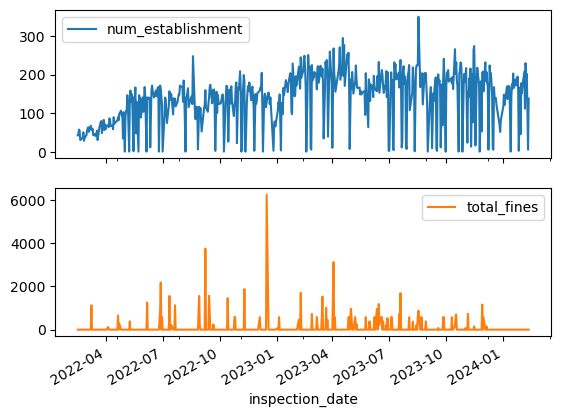

In [287]:
# This is a jupyter-specific "magic" command to render plots in-line
%matplotlib inline
import matplotlib.pyplot as plt

# Let's plot the Dine Safe Summary data below:

df_DineSafe_summary.plot(subplots=True)

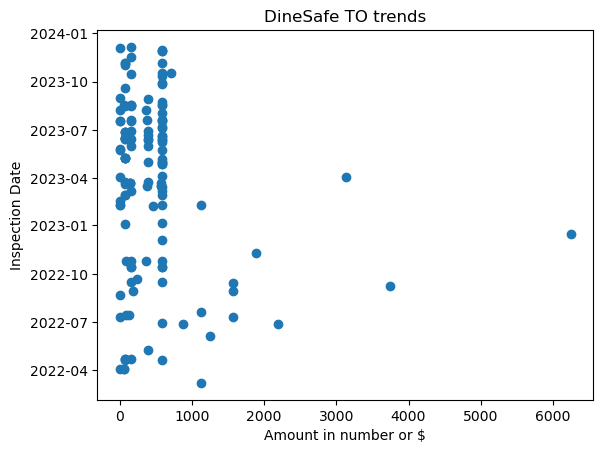

In [291]:

# Let's combine them and ensure that the plot includes labels, a title, a grid, and a legend:

plt.scatter(dine_safe_TO['amount_fined'],dine_safe_TO['inspection_date'])
plt.title(args.title)
#adds x-axis label  
plt.ylabel(config['plot_config']['ylabel']) 
#adds y-axis label 
plt.xlabel(config['plot_config']['xlabel'])
#adds legend , with proper positioning
#adds grid with an alpha value of 0.8
plt.savefig(f'{args.output_file}.png')

- END - cnb